In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# cart desicion tree
hr = pd.read_csv('HR_comma_sep.csv', delimiter = ',')
hr



,left-company,satisf_level,last_evaluation,number_projects,avg_hrs_per_mo,yrs_at_company,Work_accident,promoted_last_5yrs,sales,salary_level
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,1,0.40,0.57,2,151,3,0,0,support,low
14995,1,0.37,0.48,2,160,3,0,0,support,low
14996,1,0.37,0.53,2,143,3,0,0,support,low
14997,1,0.11,0.96,6,280,4,0,0,support,low


In [3]:
#function for dummy data
def convert_object_to_category(df,arr_col_names=None):
    if arr_col_names:
        for col in arr_col_names:
            df[col] = df[col].astype('category')
    else:
        for col in df:
            if df[col].dtype == 'object':
                df[col] = df[col].astype('category')
    return df
hr = convert_object_to_category(hr)
hr.dtypes

left-company             int64
satisf_level           float64
last_evaluation        float64
number_projects          int64
avg_hrs_per_mo           int64
yrs_at_company           int64
Work_accident            int64
promoted_last_5yrs       int64
sales                 category
salary_level          category
dtype: object

In [4]:
def category_to_dummy (df, arr_cols=None):
    if arr_cols:
        df = pd.get_dummies(df, prefix = arr_cols ,columns= arr_cols, drop_first = True) 
        # drop the done dummy data col aka original
    else:
        categories = df.select_dtypes(include='category')
        arr =list(categories.keys())
        df = pd.get_dummies(df, prefix = arr, columns = arr, drop_first = True)
    return df
hr = category_to_dummy(hr)
hr

,left-company,satisf_level,last_evaluation,number_projects,avg_hrs_per_mo,yrs_at_company,Work_accident,promoted_last_5yrs,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_level_low,salary_level_medium
0,1,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,1,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14995,1,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14996,1,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14997,1,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,1,0


In [5]:
# create predictor col and ... 
def get_y_and_x(df, y_col):
    y = df[y_col]
    #Drop it from df
    x = df.drop(columns = y_col)
    return y , x
y, x = get_y_and_x(hr, 'left-company')


In [6]:
# create training data and validation data
def make_train_and_validate(x_input,y_output):
    # return an array of arrays 
    from sklearn.model_selection import train_test_split
    X_train, X_valid, y_train, y_valid = train_test_split(x_input, y_output, test_size = 0.4, random_state=1)
    return [[X_train, X_valid], [y_train, y_valid]]
data = make_train_and_validate(x,y)


[5.04e-01 1.46e-01 1.08e-01 8.83e-02 1.34e-01 1.67e-03 0.00e+00 5.04e-05
 6.18e-04 2.18e-04 1.18e-03 6.33e-04 0.00e+00 2.20e-03 1.01e-03 3.26e-03
 5.13e-03 3.37e-03]
              precision    recall  f1-score   support

      stayed       0.98      0.98      0.98      4550
        left       0.94      0.95      0.95      1450

    accuracy                           0.97      6000
   macro avg       0.96      0.97      0.96      6000
weighted avg       0.97      0.97      0.97      6000

Confusion matrix
[[4463   87]
 [  73 1377]]
Normalized confusion matrix
[[0.98 0.02]
 [0.05 0.95]]


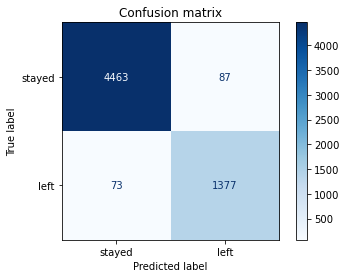

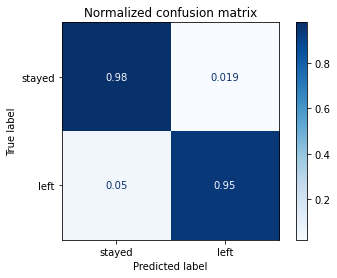

In [9]:
def decision_tree(data,display_names):
    from sklearn.tree import DecisionTreeClassifier, plot_tree
    from sklearn.metrics import classification_report, plot_confusion_matrix
    if type(data) is not list:
        print('ERR! param data is empty list! \nlist structure is: [[x_train, x_valid],[y_train, y_valid]]')
        return
    dt = DecisionTreeClassifier()
    # Parameters
    n_classes = 2
    # Train
    x_train = data[0][0]
    y_train = data[1][0]
    x_valid = data[0][1]
    y_valid = data[1][1]
    dt = dt.fit(x_train, y_train)

    y_pred = dt.predict(x_valid)
    print(dt.feature_importances_)
    print(classification_report(y_valid, y_pred, labels=None, target_names=display_names, sample_weight=None, digits=2))

    # Create a confusion matrix
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix", None),
                    ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(dt, x_valid, y_valid,
                                    display_labels=display_names,
                                    cmap=plt.cm.Blues,
                                    normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    # classnames = (display_names)
    # fig = plt.figure(figsize=(100,80))
    # fig.savefig("dec_tree.png")
    plt.show()
    return
decision_tree(data, ["stayed","left"])